<a href="https://colab.research.google.com/github/jpawebb/Crypto_Link/blob/main/CryptoCompare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
# Grab coin data from API, plot and compare T30 days
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [220]:
# get data
def get_data_func(symbol):

  price_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym={}&tsym=GBP&limit=30'.format(symbol)
  price_data = requests.get(price_url).json()['Data']['Data']

  df_price = pd.DataFrame(price_data)
  df_price['datetime'] = pd.to_datetime(df_price['time'], unit='s')
  df_price = df_price.set_index('datetime')
  
  # Prices themselves directly incomparable so I will plot mean returns
  df_price['rtn'] = df_price['close'].pct_change()


  # Average, median and std
  AvRtn = df_price['rtn'].mean()
  MedRtn = df_price['rtn'].median()
  StdDev = df_price['rtn'].std()
  print(symbol)
  print('Average Return = ', round(AvRtn, 4), '%')
  print('Median Return = ', round(MedRtn, 4), '%')
  print('Standard Deviation = ', round(StdDev, 5), '%\n')


  return df_price

In [221]:
# Iterating over a coin list to print simple statistics
# You can conclude BTC out performed ETH in the period (09/02/21)-(11/03-21)
coin_list = ['BTC', 'ETH']
coins_df = pd.DataFrame()

for coin in coin_list:
  df = get_data_func(coin)
  coins_df[coin] = df['rtn']


BTC
Average Return =  0.0073 %
Median Return =  0.0061 %
Standard Deviation =  0.04328 %

ETH
Average Return =  0.0013 %
Median Return =  0.0017 %
Standard Deviation =  0.04872 %



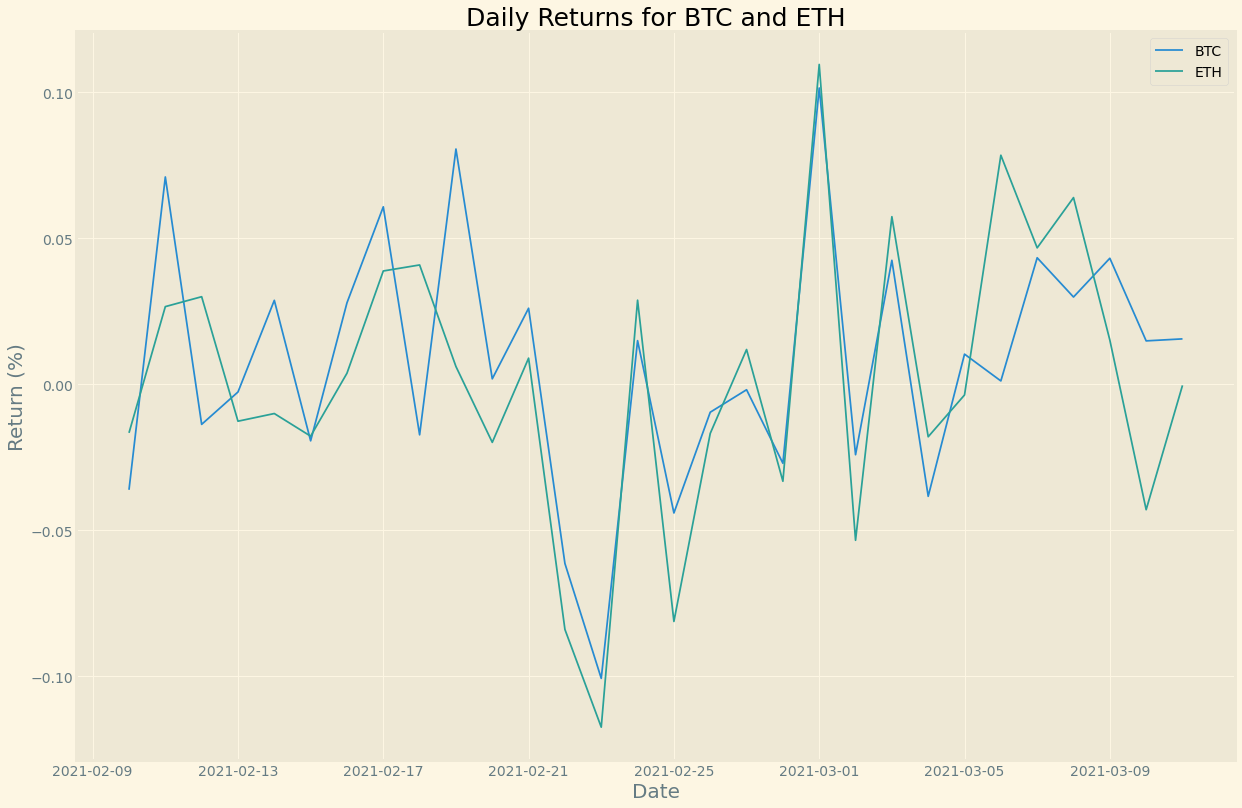

In [222]:
# Plot daily returns
plt.figure(figsize=(18.5, 12.5))
plt.plot(coins_df, lw=1.75)
plt.title('Daily Returns for BTC and ETH', fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Return (%)", fontsize=20)
plt.legend(loc=0, labels=coin_list)

In [223]:
# Get blockchain data

def get_block_and_price_data(symbol):

  # price data
  price_url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym={}&tsym=GBP&limit=30'.format(symbol)
  price_data = requests.get(price_url).json()['Data']['Data']

  # block dataa
  APIKEY = 'be5138d4832a7bc23f39c518f6a7e07a76cbea93ca224491190683c6d0a19ea6'
  block_url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day?api_key=be5138d4832a7bc23f39c518f6a7e07a76cbea93ca224491190683c6d0a19ea6&limit=2000&fsym=' + symbol
  block_data = requests.get(block_url).json()['Data']['Data']

  # Dataframe reindexing
  block_df = pd.DataFrame(block_data)
  block_df['datetime'] = pd.to_datetime(block_df['time'], unit='s')
  price_df = pd.DataFrame(price_data)
  price_df['datetime'] = pd.to_datetime(price_df['time'], unit='s')

  # Combine dataframes
  combined_df = block_df.set_index('datetime').merge(price_df.set_index('datetime'), on='datetime')

  return combined_df


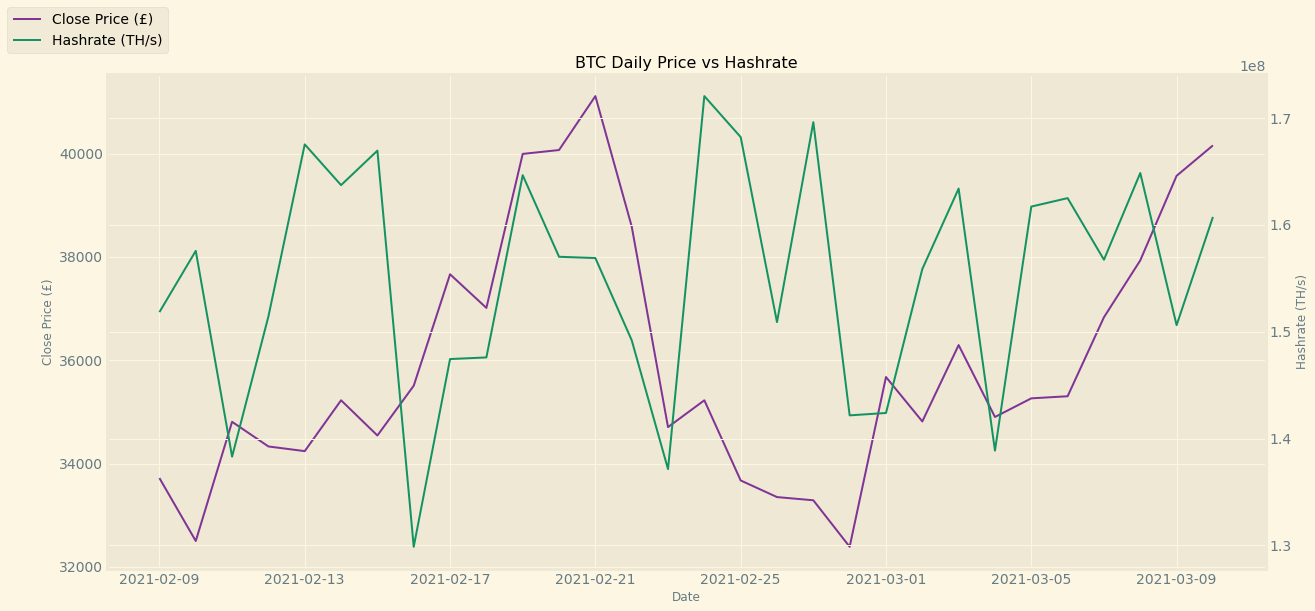

In [224]:
# Dual axis chart
BTC_df = get_block_and_price_data('BTC') 
# BTC_df

labels = ['Close Price (£)', 'Hashrate (TH/s)']
fig, ax1 = plt.subplots(figsize=(18.5, 8.5), nrows=1, ncols=1)

plt.title('BTC Daily Price vs Hashrate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (£)')
ax1.plot(BTC_df.index, BTC_df['close'], color='#803495')

ax2 = ax1.twinx()
ax2.set_ylabel('Hashrate (TH/s)')
ax2.plot(BTC_df.index, BTC_df['hashrate'], color='#139361')
fig.legend(labels=('Close Price (£)','Hashrate (TH/s)'), loc=2)


In [225]:
# negligible statistcal relationship as illustrated
np.corrcoef(BTC_df['close'], BTC_df['hashrate'])

array([[1.        , 0.06489652],
       [0.06489652, 1.        ]])